# **Introduction**
In this project, we are going to build a model using BERT to validate user feedback in an EdTech (educational technology) application. The goal is to check if the feedback provided by a user matches the reason they selected from a dropdown. The model will classify feedback into two categories:

Label 1: Feedback matches the reason (relevant).

Label 0: Feedback does not match the reason (irrelevant).

In [ ]:
The below cell loads the training and evaluation data from Excel files into pandas DataFrames. It then shows the first few rows of each dataset to check their content.

In [37]:
import pandas as pd

train_file = "/content/train.xlsx"
eval_file = "/content/evaluation.xlsx"

train_df = pd.read_excel(train_file, engine='openpyxl')
eval_df = pd.read_excel(eval_file, engine='openpyxl')

# Display first few rows to verify structure
train_df.head(), eval_df.head()


(                                            text  \
 0  this is an amazing app for online classes!but   
 1                 very practical and easy to use   
 2  this app is very good for video conferencing.   
 3               i can not download this zoom app   
 4             i am not able to download this app   
 
                                    reason  label  
 0  good app for conducting online classes      1  
 1                    app is user-friendly      1  
 2             good for video conferencing      1  
 3             unable to download zoom app      1  
 4                want to download the app      1  ,
                                                 text  \
 0            the app is crashing when i play a vedio   
 1  but i want to connect it to the tv from one de...   
 2        very helpful when and home working remotley   
 3  this zoom so called and missed call and mobile...   
 4                            one of my favorite apps   
 
                       

# **Merging, Balancing, and Shuffling the Dataset**

The below cell merges the training and evaluation datasets, checks the label distribution before balancing, and balances the dataset by undersampling the majority class. It then shuffles the dataset and prints the label distribution after balancing.


In [38]:

full_df = pd.concat([train_df, eval_df], ignore_index=True)

# Check label distribution before balancing
print("Label distribution before balancing:")
print(full_df['label'].value_counts())

# Balance the dataset
min_count = full_df['label'].value_counts().min()
class_0 = full_df[full_df['label'] == 0].sample(n=min_count, random_state=42)
class_1 = full_df[full_df['label'] == 1].sample(n=min_count, random_state=42)

# Concatenate both classes
balanced_df = pd.concat([class_0, class_1], ignore_index=True).sample(frac=1.0, random_state=42)

# Check distribution after balancing
print("\nLabel distribution after balancing:")
print(balanced_df['label'].value_counts())


Label distribution before balancing:
label
0    5999
1    5062
Name: count, dtype: int64

Label distribution after balancing:
label
0    5062
1    5062
Name: count, dtype: int64


# **Check Dataset Structure**

This cell displays basic information and the first few rows of both the training and evaluation datasets to verify the structure and data types.


In [39]:
# Check the columns and basic info of both datasets
train_df.info(), eval_df.info()

# Check the first few rows of both datasets to confirm the structure
train_df.head(), eval_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2061 non-null   object
 1   reason  2061 non-null   object
 2   label   2061 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 48.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9000 non-null   object
 1   reason  9000 non-null   object
 2   label   9000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 211.1+ KB


(                                            text  \
 0  this is an amazing app for online classes!but   
 1                 very practical and easy to use   
 2  this app is very good for video conferencing.   
 3               i can not download this zoom app   
 4             i am not able to download this app   
 
                                    reason  label  
 0  good app for conducting online classes      1  
 1                    app is user-friendly      1  
 2             good for video conferencing      1  
 3             unable to download zoom app      1  
 4                want to download the app      1  ,
                                                 text  \
 0            the app is crashing when i play a vedio   
 1  but i want to connect it to the tv from one de...   
 2        very helpful when and home working remotley   
 3  this zoom so called and missed call and mobile...   
 4                            one of my favorite apps   
 
                       

# **Text Cleaning**

This cell cleans the 'text' and 'reason' columns by removing special characters, changing the text to lowercase, and removing common words like "the" and "is". This makes the data ready for the model to process. The cleaned data is shown at the end.


In [40]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load datasets
train_file = "/content/train.xlsx"
eval_file = "/content/evaluation.xlsx"
train_df = pd.read_excel(train_file, engine='openpyxl')
eval_df = pd.read_excel(eval_file, engine='openpyxl')

# Merge the train and eval datasets
full_df = pd.concat([train_df, eval_df], axis=0)

# Clean text and reason columns
def clean_text(text):
    # Remove non-alphabetical characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply cleaning function to the 'text' and 'reason' columns in the balanced dataset
full_df['text'] = full_df['text'].apply(clean_text)
full_df['reason'] = full_df['reason'].apply(clean_text)

# Display the cleaned data
full_df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original dataset label distribution:
label
0    5999
1    5062
Name: count, dtype: int64

Label distribution after balancing:
label
0    5062
1    5062
Name: count, dtype: int64


text  \
0  full advertising selling articles access witho...   
1                                      stuck loading   
2                             patient willing repeat   
3  shame good programmes ringfenced yet another s...   
4         highly anticipated meeting website amazing   

                               reason  label  
0                            app good      0  
1                      unable use app      0  
2  good app conducting online meeting      0  
3             app subscription worthy      0  
4            good online presentation      0

# **Check Label Distribution**

This line displays the count of each label (0 and 1) in the balanced dataset. It helps verify that the classes are equally represented after balancing the data.


In [41]:
balanced_df['label'].value_counts()


label
0    5062
1    5062
Name: count, dtype: int64

# **Tokenizing Text and Reason Columns**

This cell uses the BERT tokenizer to process the 'text' and 'reason' columns from both the training and evaluation datasets. It combines these columns, prepares them for the model, and displays the tokenized results.


In [42]:
from transformers import BertTokenizer

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


def tokenize_data(row):
    return tokenizer(row['text'] + " " + row['reason'], padding=True, truncation=True, return_tensors='pt')

train_tokens = train_balanced.apply(tokenize_data, axis=1)
eval_tokens = eval_df.apply(tokenize_data, axis=1)
train_tokens.head(), eval_tokens.head()


(0    [input_ids, token_type_ids, attention_mask]
 1    [input_ids, token_type_ids, attention_mask]
 2    [input_ids, token_type_ids, attention_mask]
 3    [input_ids, token_type_ids, attention_mask]
 4    [input_ids, token_type_ids, attention_mask]
 dtype: object,
 0    [input_ids, token_type_ids, attention_mask]
 1    [input_ids, token_type_ids, attention_mask]
 2    [input_ids, token_type_ids, attention_mask]
 3    [input_ids, token_type_ids, attention_mask]
 4    [input_ids, token_type_ids, attention_mask]
 dtype: object)

# **Creating Custom Dataset and DataLoader**

This cell defines a custom **`FeedbackDataset`** class to handle the tokenized data. It then creates PyTorch **`DataLoader` **objects for both training and evaluation datasets to enable efficient batch processing during model training.


In [43]:
import torch
from torch.utils.data import Dataset, DataLoader

class FeedbackDataset(Dataset):
    def __init__(self, tokens, labels):
        self.tokens = tokens
        self.labels = labels

    def __len__(self):
        return len(self.tokens)

    def __getitem__(self, idx):
        return {
            'input_ids': self.tokens.iloc[idx]['input_ids'].squeeze(),
            'attention_mask': self.tokens.iloc[idx]['attention_mask'].squeeze(),
            'labels': torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        }

# Create PyTorch Datasets
train_dataset = FeedbackDataset(train_tokens, train_balanced['label'])
eval_dataset = FeedbackDataset(eval_tokens, eval_df['label'])

# Create DataLoaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=16)


# **Loading BERT Model and Setting Up Training**

This cell loads a pre-trained BERT model for binary classification, sets up the optimizer and learning rate scheduler, and moves the model to GPU if available to speed up training.


In [44]:
from transformers import BertForSequenceClassification, AdamW
from torch.optim.lr_scheduler import StepLR


model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = StepLR(optimizer, step_size=1, gamma=0.9)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

# **Handling Padding with Custom Collate Function**

This cell defines a custom collate function to pad tokenized sequences in each batch to the same length. It ensures smooth batch processing by updating the DataLoaders to use this padding logic.


In [46]:
from torch.nn.utils.rnn import pad_sequence
from torch.nn.functional import pad

def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    labels = [item['labels'] for item in batch]

    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_mask = pad_sequence(attention_mask, batch_first=True, padding_value=0)
    labels = torch.stack(labels, dim=0)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels
    }

# Update DataLoader to use the custom collate function
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
eval_loader = DataLoader(eval_dataset, batch_size=16, collate_fn=collate_fn)


# **Model Evaluation and Metrics Visualization**

This cell defines a function to evaluate the model's performance using accuracy, precision, recall, and F1-score. It also displays a confusion matrix to visualize how well the model predicts each class.


# **Saving the Model and Results**

This cell saves the fine-tuned BERT model and tokenizer to a local folder. It also stores the evaluation metrics (accuracy, precision, recall, F1-score) for future reference or reporting.

Evaluating: 100%|██████████| 563/563 [30:49<00:00,  3.28s/it]


Accuracy: 0.3332
Precision: 0.3333
Recall: 0.9993
F1-Score: 0.4999


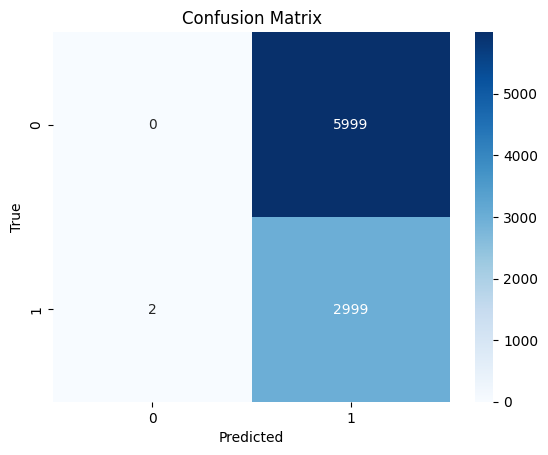

✅ Model and evaluation results saved.


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm import tqdm
import json

# Define evaluation function
def evaluate(model, eval_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(eval_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, precision, recall, f1

# Evaluate the model and get metrics
accuracy, precision, recall, f1 = evaluate(model, eval_loader, device)

# Save the model and tokenizer
model.save_pretrained('bert_feedback_model')
tokenizer.save_pretrained('bert_feedback_model')

# Save evaluation results to a dictionary
eval_results = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

# Optionally save the results to a JSON file
with open('evaluation_results.json', 'w') as f:
    json.dump(eval_results, f, indent=4)

print("✅ Model and evaluation results saved.")


# **User Input Prediction Function**

This cell defines a prediction pipeline where a user can input *text* and *reason*. The model processes this input and predicts whether the feedback is aligned (label 1) or not (label 0), and displays a friendly message accordingly.


In [63]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer

# Load your trained model and tokenizer from the correct path
model = BertForSequenceClassification.from_pretrained('bert_feedback_model')
tokenizer = BertTokenizer.from_pretrained('bert_feedback_model')

# Function to make predictions on user input
def predict_feedback(text, reason):
    # Tokenize the text and reason
    inputs = tokenizer(text + " " + reason, padding=True, truncation=True, return_tensors='pt')

    # Move the inputs and model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Make prediction
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=-1).item()

    return prediction

# Function to display the result in text form
def display_result(prediction):
    if prediction == 1:
        return "✅ Feedback is aligned with the reason."
    else:
        return "❌ Feedback is NOT aligned with the reason."


# **Sample Inputs:**
**Label 1:**
Feedback Text: "This app helps me schedule my tasks and stay organized."

Reason: "Good app for task management"

Expected Output: "✅ Feedback is aligned with the reason."

**Label 0:**
Feedback Text: "The app crashes when I try to open it."

Reason: "Good app for task management"

Expected Output: "❌ Feedback is NOT aligned with the reason."

In [64]:
# Example of taking user input for testing
text_input = input("Enter feedback text: ")
reason_input = input("Enter the reason: ")

# Make prediction
prediction = predict_feedback(text_input, reason_input)

# Display the result
result = display_result(prediction)
print(result)


Enter feedback text: The app crashes when I try to open it
Enter the reason: Good app for task management
❌ Feedback is NOT aligned with the reason.


# **✅ End of Notebook**
This project checks if feedback matches a reason using BERT.

You can enter your own text and reason to test it.

The model gives a simple result: aligned ✅ or not aligned ❌.

Everything is saved and ready to reuse.